# Customer Segmentation using K-Means Clustering

Saving online_shoppers_intention.csv to online_shoppers_intention.csv
Dataset Shape: (12330, 18)
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0 

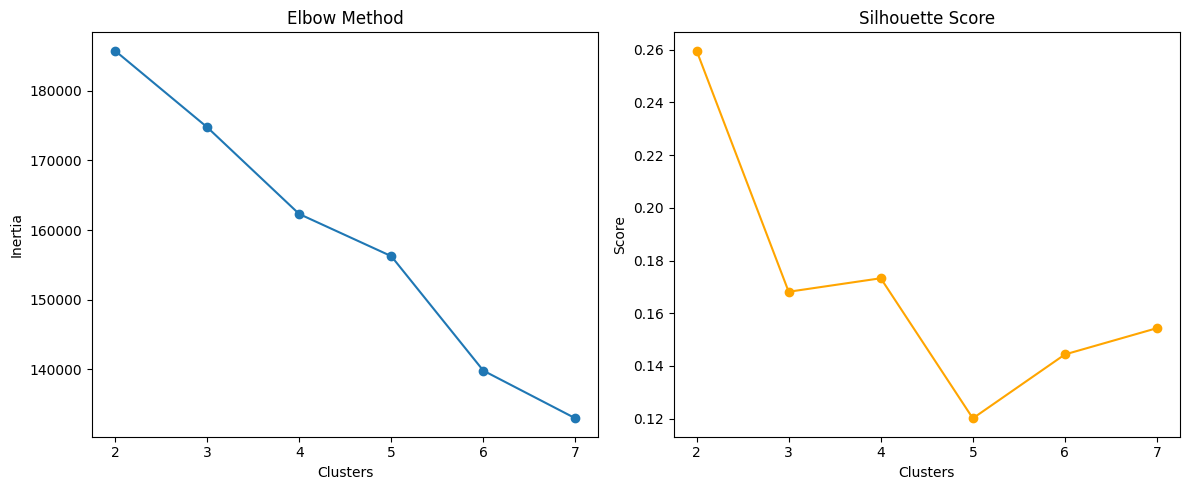

Cluster Summary:
          Administrative  Administrative_Duration  Informational  \
cluster                                                           
0                  0.92                    25.61           0.18   
1                  2.49                    82.52           0.29   
2                  1.41                    41.20           0.19   
3                  7.34                   303.63           2.41   

         Informational_Duration  ProductRelated  ProductRelated_Duration  \
cluster                                                                    
0                          7.88           24.83                   830.20   
1                         13.87           17.69                   621.81   
2                          7.26           22.01                   813.99   
3                        202.83           97.12                  3837.40   

         BounceRates  ExitRates  PageValues  SpecialDay  Month  \
cluster                                                 

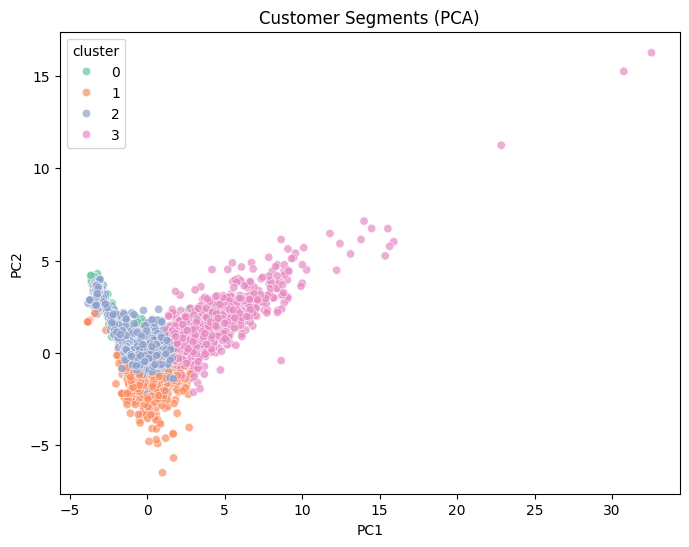

Clustered data saved as segmented_customers.csv


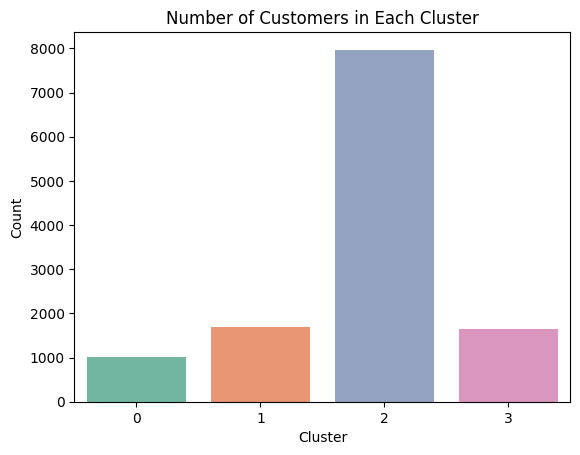

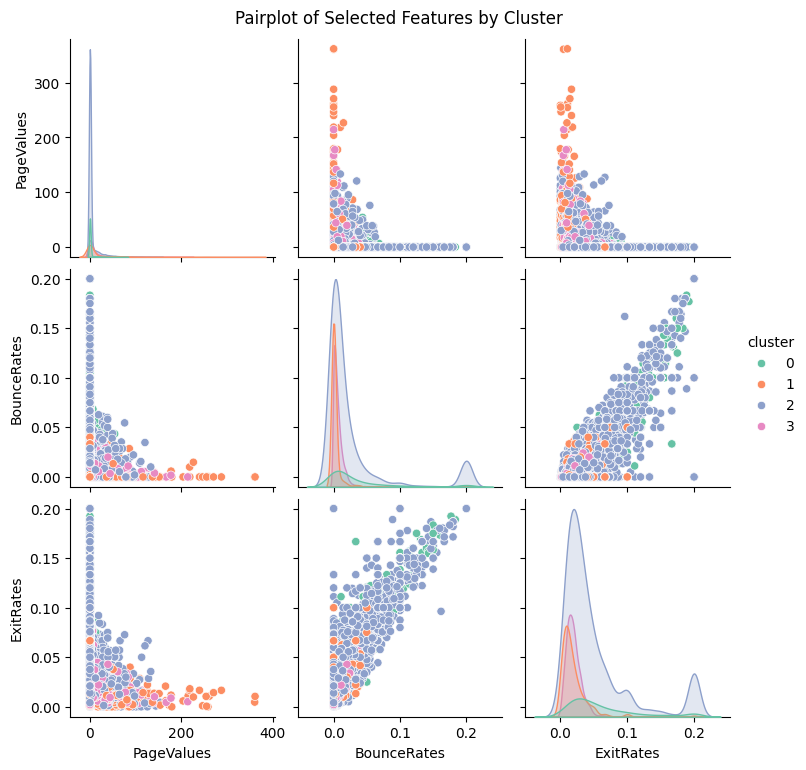

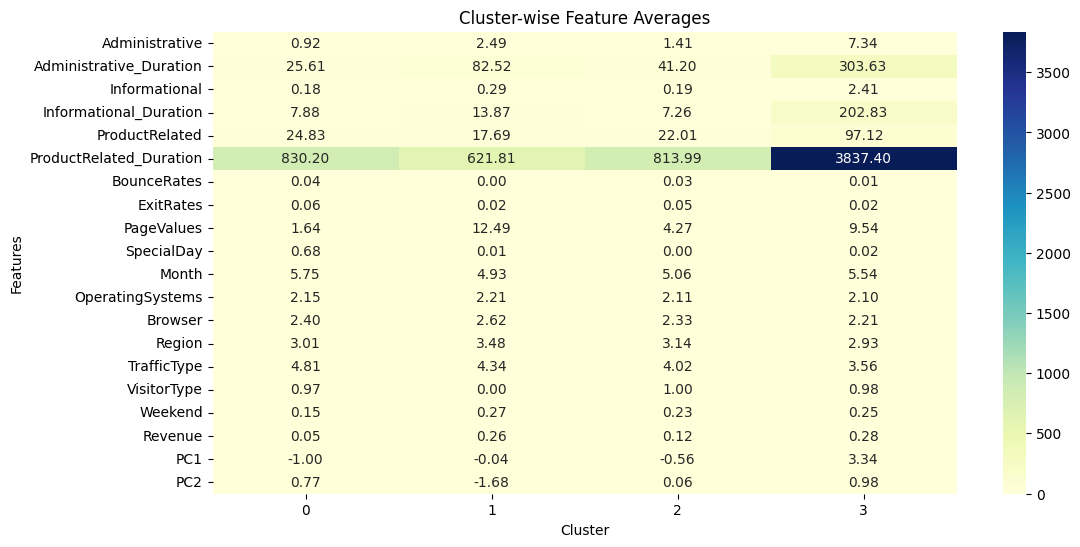

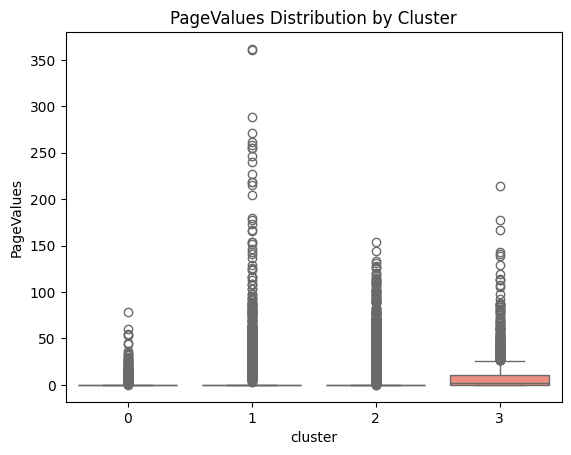

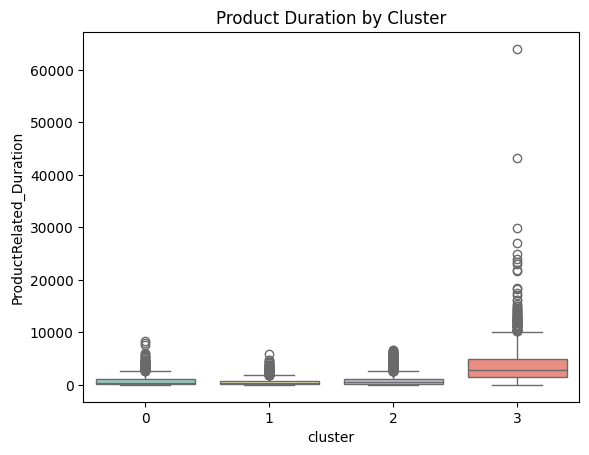

In [7]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import joblib

# 2. Upload Dataset
from google.colab import files
uploaded = files.upload()

# 3. Load Dataset
df = pd.read_csv("online_shoppers_intention.csv")
df.dropna(inplace=True)
df = df.copy()
print("Dataset Shape:", df.shape)
print(df.head())

# 4. Data Preprocessing
df['Month'] = pd.Categorical(df['Month']).codes
df['VisitorType'] = df['VisitorType'].apply(lambda x: 1 if x == 'Returning_Visitor' else 0)
df['Weekend'] = df['Weekend'].astype(int)
X = df.drop('Revenue', axis=1)

# 5. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Determine Optimal Number of Clusters using Elbow and Silhouette Methods
inertia = []
silhouette = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 8), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(range(2, 8), silhouette, marker='o', color='orange')
plt.title("Silhouette Score")
plt.xlabel("Clusters")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

# 7. Apply K-Means Clustering
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 8. Cluster Analysis
cluster_summary = df.groupby('cluster').mean().round(2)
print("Cluster Summary:\n", cluster_summary)

# 9. Visualize Clusters with PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PC1'], df['PC2'] = components[:, 0], components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='cluster', palette='Set2', alpha=0.7)
plt.title("Customer Segments (PCA)")
plt.show()

# 10. Save Clustered Data
df.to_csv('segmented_customers.csv', index=False)
print("Clustered data saved as segmented_customers.csv")


# 11. Additional Visualizations

# A. Cluster Counts
sns.countplot(x='cluster', data=df, palette='Set2')
plt.title("Number of Customers in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# B. Pairplot for selected behavioral features
sample_features = ['PageValues', 'BounceRates', 'ExitRates', 'cluster']
sns.pairplot(df[sample_features], hue='cluster', palette='Set2', diag_kind='kde')
plt.suptitle("Pairplot of Selected Features by Cluster", y=1.02)
plt.show()

# C. Heatmap of Cluster-wise Feature Averages
cluster_features = df.groupby('cluster').mean()
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_features.T, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title("Cluster-wise Feature Averages")
plt.ylabel("Features")
plt.xlabel("Cluster")
plt.show()

# D. Boxplots for Behavioral Features
sns.boxplot(x='cluster', y='PageValues', data=df, palette='Set3')
plt.title("PageValues Distribution by Cluster")
plt.show()

sns.boxplot(x='cluster', y='ProductRelated_Duration', data=df, palette='Set3')
plt.title("Product Duration by Cluster")
plt.show()